In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
#Read In CSV
csv_url = "Resources/Crash_Reporting_-_Drivers_Data.csv"

original_df = pd.read_csv(csv_url, low_memory=False)

In [3]:
original_df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
#Grabbing the columns to analyze
trimmed_df = original_df[[ "Driver Substance Abuse" , 'Non-Motorist Substance Abuse' , 'Driver At Fault',  
                          'Injury Severity', 'Driver Distracted By', 'Drivers License State']]

#Group df by injury severity
grouped_df = trimmed_df.groupby("Injury Severity")

In [5]:
#Get counts for drivers license state and injury severity and puts them into series
DLS_s = grouped_df["Drivers License State"].value_counts()
Injury_Severity_s = trimmed_df["Injury Severity"].value_counts()

in_state_injury_percentages = []
#Calculate percentages of in-state injuries for each injury type
for injury_type in Injury_Severity_s.index:
    in_state_injury_percentages.append(DLS_s[injury_type]["MD"] * 100 / Injury_Severity_s[injury_type]) 

In [6]:
#Calcuate expected values based on # of MD accidents
expected_value_percentage_DLS = len(trimmed_df.loc[trimmed_df["Drivers License State"] == "MD"]) / len(trimmed_df) * 100
expected_values_DLS = expected_value_percentage_DLS * Injury_Severity_s / 100

In [7]:
expected_value_percentage_DLS

82.99875076261584

In [8]:
#Calculate observed values
observed_values_DLS = Injury_Severity_s * in_state_injury_percentages / 100

In [9]:
# Perform the test
stats.chisquare(observed_values_DLS, expected_values_DLS)
#There is a signficant difference.

Power_divergenceResult(statistic=226.54100912078457, pvalue=7.331267261900806e-48)

In [10]:
#Create a DataFrame from the data
in_state_injury_percentages_df = pd.DataFrame( in_state_injury_percentages , 
                                              columns =  ["Observed Percentages"] )
in_state_injury_percentages_df["Injury Type"] = Injury_Severity_s.index
in_state_injury_percentages_df["Expected Percentages"] = expected_value_percentage_DLS

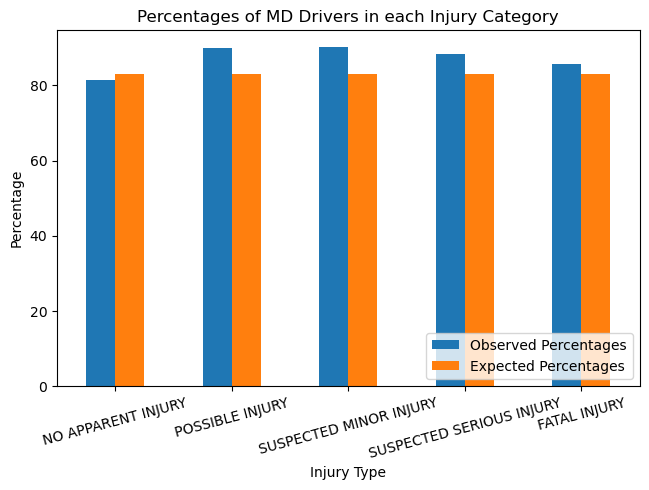

In [11]:
#Plot bar chart
plot = in_state_injury_percentages_df.plot(kind = "bar", x = "Injury Type")
plot.set_xticklabels(in_state_injury_percentages_df["Injury Type"] , rotation = 15)
plt.tight_layout()
plt.title("Percentages of MD Drivers in each Injury Category")
plt.xlabel("Injury Type")
plt.ylabel("Percentage")
plt.legend(loc = "lower right")

plt.savefig("jack_output_figures/DLS_Percentage_Bar_Chart.png")

In [12]:
DAF_s = grouped_df["Driver At Fault"].value_counts()

In [13]:
DAF_injury_percentages = []
#Calculate percentages of Driver-At-Fault injuries for each injury type
for injury_type in Injury_Severity_s.index:
    DAF_injury_percentages.append(DAF_s[injury_type]["Yes"] * 100 / Injury_Severity_s[injury_type]) 

In [14]:
#Calcuate expected values based on # of DAF accidents
expected_value_percentage_DAF = len(trimmed_df.loc[trimmed_df["Driver At Fault"] == "Yes"]) / len(trimmed_df) * 100
expected_values_DAF = expected_value_percentage_DAF * Injury_Severity_s / 100

In [15]:
expected_value_percentage_DAF

53.725923128322826

In [16]:
#Calculate observed values
observed_values_DAF = Injury_Severity_s * DAF_injury_percentages / 100

In [17]:
# Perform the test
stats.chisquare(observed_values_DAF, expected_values_DAF)
#There is a signficant difference.

Power_divergenceResult(statistic=1042.5532856378825, pvalue=2.139592576961295e-224)

In [18]:
#Create a DataFrame from the data
DAF_injury_percentages_df = pd.DataFrame( DAF_injury_percentages , 
                                              columns =  ["Observed Percentages"] )
DAF_injury_percentages_df["Injury Type"] = Injury_Severity_s.index
DAF_injury_percentages_df["Expected Percentages"] = expected_value_percentage_DAF

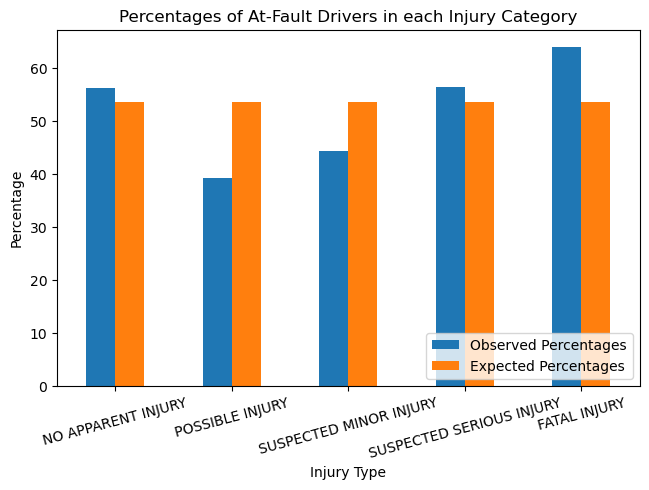

In [19]:
#Plot bar chart
plot = DAF_injury_percentages_df.plot(kind = "bar", x = "Injury Type")
plot.set_xticklabels(DAF_injury_percentages_df["Injury Type"] , rotation = 15)
plt.tight_layout()
plt.title("Percentages of At-Fault Drivers in each Injury Category")
plt.xlabel("Injury Type")
plt.ylabel("Percentage")
plt.legend(loc = "lower right")

plt.savefig("jack_output_figures/DAF_Percentage_Bar_Chart.png")

In [20]:
trimmed_df['Driver Distracted By'].unique()
#Backup option if data isn't interesting

array(['LOOKED BUT DID NOT SEE', 'NOT DISTRACTED', 'UNKNOWN',
       'INATTENTIVE OR LOST IN THOUGHT', 'OTHER DISTRACTION',
       'USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE',
       'NO DRIVER PRESENT', 'TEXTING FROM A CELLULAR PHONE',
       'EATING OR DRINKING',
       'DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT',
       'OTHER CELLULAR PHONE RELATED', 'BY MOVING OBJECT IN VEHICLE',
       'TALKING OR LISTENING TO CELLULAR PHONE', 'BY OTHER OCCUPANTS',
       'ADJUSTING AUDIO AND OR CLIMATE CONTROLS',
       'OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)',
       'DIALING CELLULAR PHONE',
       'USING DEVICE OBJECT BROUGHT INTO VEHICLE', 'SMOKING RELATED'],
      dtype=object)

In [21]:
trimmed_df['Non-Motorist Substance Abuse'].unique()
#Make a figure, percent of injury accidents that involve alchohol, illegal drugs, combination, none or other.

array([nan, 'NONE DETECTED', 'UNKNOWN', 'ALCOHOL PRESENT',
       'ILLEGAL DRUG CONTRIBUTED', 'N/A, NONE DETECTED',
       'ALCOHOL CONTRIBUTED, ALCOHOL PRESENT', 'ALCOHOL CONTRIBUTED',
       'ILLEGAL DRUG PRESENT', 'OTHER', 'COMBINED SUBSTANCE PRESENT',
       'NONE DETECTED, UNKNOWN', 'N/A, UNKNOWN', 'MEDICATION PRESENT',
       'COMBINATION CONTRIBUTED', 'ALCOHOL PRESENT, NONE DETECTED'],
      dtype=object)

In [22]:
trimmed_df["Driver Substance Abuse"].unique()

array(['NONE DETECTED', nan, 'UNKNOWN', 'ALCOHOL PRESENT',
       'COMBINED SUBSTANCE PRESENT', 'ILLEGAL DRUG PRESENT',
       'ALCOHOL CONTRIBUTED', 'ILLEGAL DRUG CONTRIBUTED',
       'MEDICATION CONTRIBUTED', 'MEDICATION PRESENT',
       'COMBINATION CONTRIBUTED', 'OTHER'], dtype=object)

In [23]:
#Grabbing relevant columns
substance_abuse_df = trimmed_df[["Injury Severity" , 'Non-Motorist Substance Abuse' , "Driver Substance Abuse"]]

In [24]:
#Condensing categories
substance_abuse_df_1 = substance_abuse_df.replace(['ALCOHOL PRESENT', 'ALCOHOL CONTRIBUTED, ALCOHOL PRESENT', 'ALCOHOL CONTRIBUTED', 
                                                'ALCOHOL PRESENT, NONE DETECTED'] , "Alcohol") 
substance_abuse_df_2 = substance_abuse_df_1.replace(['ILLEGAL DRUG PRESENT', 'ILLEGAL DRUG CONTRIBUTED'] , "Drugs")
substance_abuse_df_3 = substance_abuse_df_2.replace(['COMBINATION CONTRIBUTED','COMBINED SUBSTANCE PRESENT'] , "Alcohol and Drugs")

In [25]:
#Get the counts for accidents that involve Alcohol and Drugs
Alcohol_counts_df = substance_abuse_df_3.loc[(substance_abuse_df_3["Driver Substance Abuse"] == "Alcohol") | 
                     (substance_abuse_df_3["Non-Motorist Substance Abuse"] == "Alcohol")]
Alcohol_counts = len(Alcohol_counts_df)
Drug_counts_df = substance_abuse_df_3.loc[(substance_abuse_df_3["Driver Substance Abuse"] == "Drugs") | 
                     (substance_abuse_df_3["Non-Motorist Substance Abuse"] == "Drugs")]
Drug_counts = len(Drug_counts_df)
Both_counts_df = substance_abuse_df_3.loc[(substance_abuse_df_3["Driver Substance Abuse"] == "Alcohol and Drugs") | 
                     (substance_abuse_df_3["Non-Motorist Substance Abuse"] == "Alcohol and Drugs")]
Both_counts = len(Both_counts_df)
No_drugs_or_alcohol_detected_counts = len(substance_abuse_df_3) - Alcohol_counts - Drug_counts - Both_counts
Alcohol_combined_counts = Alcohol_counts + Both_counts

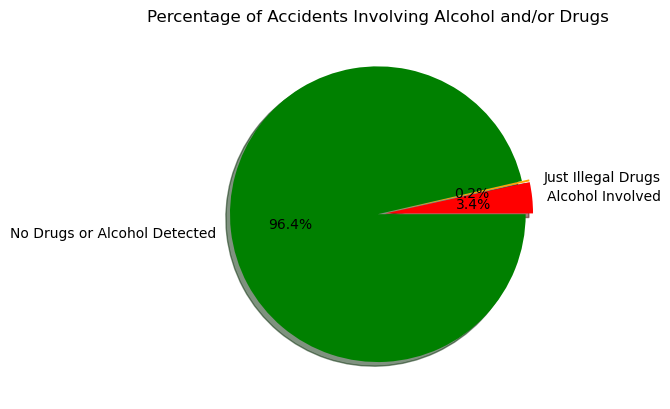

In [26]:
#Organizing data for pie chart creation
pie_info_list = [Alcohol_combined_counts, Drug_counts, No_drugs_or_alcohol_detected_counts]
labels = ["Alcohol Involved" , "Just Illegal Drugs" , "No Drugs or Alcohol Detected"]
colors = ["Red" , "Orange" , "Green"]
explode = (.05,.05,0)
plt.pie(pie_info_list, labels = labels, autopct="%1.1f%%" , colors=colors, shadow = True, explode=explode)
plt.title("Percentage of Accidents Involving Alcohol and/or Drugs")
plt.savefig("jack_output_figures/Substance_Abuse_Pie_Chart.png")

In [27]:
#Compare to pie chart with just serious or fatal accidents of percentages?
#Probably also do chi-squared to see if substance abuse is related to injury severity. Prolly don't need figure